In [9]:
# import sys
# !{sys.executable} -m pip install astropy

In [8]:
# import sys
# print(sys.executable)
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf 
from tensorflow import keras    
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import os
from keras import backend as K
import math
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor

In [12]:
rs = [3400,30] #redshift, distance cutoff for box that will be used  

#importing simulation box 
data = np.load("C:/Users/yaras/Documents/Research/Feldman/MLdata/ML100-error4.npy")

#full box 
redshift0 = data[:,0] 
distance0 = data[:,2]
distance_mod0 = data[:,1]
velocity0 = data[:,3]

#taking full box and redefining it with cutoffs 
inds = np.where(redshift0 <= rs[0])
redshift = redshift0[inds]
distance = distance0[inds]
distance_mod = distance_mod0[inds]
velocity = velocity0[inds]

In [ ]:
#making inputs and outputs into cohesive arrays 
X = np.stack([redshift/np.max(np.abs(redshift)), distance_mod/np.max(np.abs(distance_mod))],axis=-1)
y = np.stack([velocity/np.max(np.abs(velocity)), distance/np.max(np.abs(distance))],axis=-1)

In [ ]:
#splitting data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#this model is a neural net
#characterized by ALL TANH ACTIVATION FUNCTIONS, AND NON AUTOMATED (BY HAND) LEARNING RATES 
#you can customize how many layers you have, the number of nodes in them, 
#and the activation function 
model1 = keras.models.Sequential()
model1.add(keras.layers.InputLayer(input_shape=[2]))
model1.add(keras.layers.Dense(25,activation='tanh'))
model1.add(keras.layers.Dense(50,activation='tanh'))
model1.add(keras.layers.Dense(100,activation='tanh'))
model1.add(keras.layers.Dense(50,activation='tanh'))
model1.add(keras.layers.Dense(25,activation='tanh'))
model1.add(keras.layers.Dense(2,activation='tanh'))
#starting off with an optimizer that has a certain learning rate 
optimizer = keras.optimizers.Adam(lr=.001)
#finalizing model and choosing loss function 
model1.compile(loss='mean_squared_error', optimizer=optimizer)
#fitting  model with training data 
model1.fit(X_train,y_train,epochs=5)

#each set of these two lines runs the model for another 5 epochs 
#with a different learning rate 
#both the amount of epochs and learning rate can be changed 
K.set_value(model1.optimizer.learning_rate, 0.0001)
model1.fit(X_train,y_train,initial_epoch=5,epochs=10)

K.set_value(model1.optimizer.learning_rate, 0.00001)
model1.fit(X_train,y_train,initial_epoch=10,epochs=15)

K.set_value(model1.optimizer.learning_rate, 0.000001)
model1.fit(X_train,y_train,initial_epoch=15,epochs=20)

K.set_value(model1.optimizer.learning_rate, 0.0000001)
model1.fit(X_train,y_train,initial_epoch=20,epochs=25)

K.set_value(model1.optimizer.learning_rate, 0.00000001)
model1.fit(X_train,y_train,initial_epoch=25,epochs=30)

Epoch 1/5
5278/5278 [==============================] - 3s 592us/step - loss: 0.0139
Epoch 2/5
5278/5278 [==============================] - 3s 591us/step - loss: 0.0103
Epoch 3/5
5278/5278 [==============================] - 3s 588us/step - loss: 0.0102
Epoch 4/5
5278/5278 [==============================] - 3s 594us/step - loss: 0.0101
Epoch 5/5
5278/5278 [==============================] - 3s 588us/step - loss: 0.0101
Epoch 6/10
5278/5278 [==============================] - 3s 598us/step - loss: 0.0095
Epoch 7/10
5278/5278 [==============================] - 3s 602us/step - loss: 0.0095
Epoch 8/10
5278/5278 [==============================] - 3s 595us/step - loss: 0.0095
Epoch 9/10
5278/5278 [==============================] - 3s 603us/step - loss: 0.0095
Epoch 10/10
5278/5278 [==============================] - 3s 588us/step - loss: 0.0095
Epoch 11/15
5278/5278 [==============================] - 3s 594us/step - loss: 0.0094
Epoch 12/15
5278/5278 [==============================] - 3s 597us/st

In [ ]:
#this model is a neural net
#characterized by ALL SELU ACTIVATION FUNCTIONS, AND NON AUTOMATED (BY HAND) LEARNING RATES 
#you can customize how many layers you have, the number of nodes in them, 
#and the activation function 
model2 = keras.models.Sequential()
model2.add(keras.layers.InputLayer(input_shape=[2]))
model2.add(keras.layers.Dense(25,activation='selu'))
model2.add(keras.layers.Dense(50,activation='selu'))
model2.add(keras.layers.Dense(100,activation='selu'))
model2.add(keras.layers.Dense(50,activation='selu'))
model2.add(keras.layers.Dense(25,activation='selu'))
model2.add(keras.layers.Dense(2,activation='selu'))
#starting off with an optimizer that has a certain learning rate 
optimizer = keras.optimizers.Adam(lr=.001)
#finalizing model and choosing loss function 
model2.compile(loss='mean_squared_error', optimizer=optimizer)
#fitting  model with training data 
model2.fit(X_train,y_train,epochs=5)

#each set of these two lines runs the model for another 5 epochs 
#with a different learning rate 
#both the amount of epochs and learning rate can be changed 
K.set_value(model2.optimizer.learning_rate, 0.0001)
model2.fit(X_train,y_train,initial_epoch=5,epochs=10)

K.set_value(model2.optimizer.learning_rate, 0.00001)
model2.fit(X_train,y_train,initial_epoch=10,epochs=15)

K.set_value(model2.optimizer.learning_rate, 0.000001)
model2.fit(X_train,y_train,initial_epoch=15,epochs=20)

K.set_value(model2.optimizer.learning_rate, 0.0000001)
model2.fit(X_train,y_train,initial_epoch=20,epochs=25)

K.set_value(model2.optimizer.learning_rate, 0.00000001)
model2.fit(X_train,y_train,initial_epoch=25,epochs=30)

Epoch 1/5
5278/5278 [==============================] - 4s 629us/step - loss: 0.0191
Epoch 2/5
5278/5278 [==============================] - 3s 598us/step - loss: 0.0108
Epoch 3/5
5278/5278 [==============================] - 3s 593us/step - loss: 0.0102
Epoch 4/5
5278/5278 [==============================] - 3s 593us/step - loss: 0.0101
Epoch 5/5
5278/5278 [==============================] - 3s 595us/step - loss: 0.0100
Epoch 6/10
5278/5278 [==============================] - 3s 595us/step - loss: 0.0094
Epoch 7/10
5278/5278 [==============================] - 3s 591us/step - loss: 0.0094
Epoch 8/10
5278/5278 [==============================] - 3s 597us/step - loss: 0.0094
Epoch 9/10
5278/5278 [==============================] - 3s 599us/step - loss: 0.0094
Epoch 10/10
5278/5278 [==============================] - 3s 601us/step - loss: 0.0094
Epoch 11/15
5278/5278 [==============================] - 3s 589us/step - loss: 0.0093
Epoch 12/15
5278/5278 [==============================] - 3s 593us/st

In [ ]:
#this model is a neural net
#characterized by ALL SELU ACTIVATION FUNCTIONS, AND AUTOMATED LEARNING RATES WITH LOOP 
#you can customize how many layers you have, the number of nodes in them, 
#and the activation function 
model9 = keras.models.Sequential()
model9.add(keras.layers.InputLayer(input_shape=[2]))
model9.add(keras.layers.Dense(25,activation='selu'))
model9.add(keras.layers.Dense(50,activation='selu'))
model9.add(keras.layers.Dense(100,activation='selu'))
model9.add(keras.layers.Dense(50,activation='selu'))
model9.add(keras.layers.Dense(25,activation='selu'))
model9.add(keras.layers.Dense(2,activation='selu'))
#starting off with an optimizer that has a certain learning rate 
optimizer = keras.optimizers.Adam(lr=.001)
#finalizing model and choosing loss function 
model9.compile(loss='mean_squared_error', optimizer=optimizer)

#Here, the learning rate is automated using this loop
#that tries to automate the search for the best learning rate value 

#initial conditions
learningrate = 0.001
epoch_step = 4 #epochs will go in sets of 4 before changing 
epoch_lower = 0 #initial 
epoch_upper = epoch_step #initial 
threshold = 0.005 #threshold of loss difference between epochs 
while epoch_upper < 21: #adding on 20 epochs 
    K.set_value(model9.optimizer.learning_rate, learningrate) 
    a = model9.fit(X_train,y_train,initial_epoch=epoch_lower,epochs=epoch_upper)
    print(a.history['loss']) #this is how  you get the loss when the model above is fit with the given lr
    loss_difference = np.abs(a.history['loss'][2] - a.history['loss'][3]) 
    #above is comparing loss of last two epochs 
    #if there wasn't a significant change, implies you are in a minimum 
    #so increase the learning rate 
    if loss_difference < (a.history['loss'][2]*(threshold/100)): 
        learningrate = learningrate*2
    #if it was above threshold of difference, then see if a local minimum is nearby 
    #by decreasing learning rate 
    elif loss_difference > (a.history['loss'][2]*(threshold/10)): 
        learningrate = learningrate/10
    else: 
        learningrate = learningrate
    epoch_lower += epoch_step
    epoch_upper += epoch_step  

Epoch 1/4
5278/5278 [==============================] - 3s 614us/step - loss: 0.0178
Epoch 2/4
5278/5278 [==============================] - 3s 607us/step - loss: 0.0106
Epoch 3/4
5278/5278 [==============================] - 3s 615us/step - loss: 0.0102
Epoch 4/4
5278/5278 [==============================] - 3s 611us/step - loss: 0.0100
[0.012988368980586529, 0.010448970831930637, 0.010134667158126831, 0.010008426383137703]
Epoch 5/8
5278/5278 [==============================] - 3s 607us/step - loss: 0.0094
Epoch 6/8
5278/5278 [==============================] - 3s 599us/step - loss: 0.0094
Epoch 7/8
5278/5278 [==============================] - 3s 596us/step - loss: 0.0094
Epoch 8/8
5278/5278 [==============================] - 3s 602us/step - loss: 0.0094
[0.009434579871594906, 0.009423480369150639, 0.009419557638466358, 0.009420284070074558]
Epoch 9/12
5278/5278 [==============================] - 3s 608us/step - loss: 0.0094
Epoch 10/12
5278/5278 [==============================] - 3s 600us

In [ ]:
#this model is a neural net
#characterized by ALL TANH ACTIVATION FUNCTIONS, AND AUTOMATED LEARNING RATES WITH LOOP 
#you can customize how many layers you have, the number of nodes in them, 
#and the activation function 
model8 = keras.models.Sequential()
model8.add(keras.layers.InputLayer(input_shape=[2]))
model8.add(keras.layers.Dense(25,activation='tanh'))
model8.add(keras.layers.Dense(50,activation='tanh'))
model8.add(keras.layers.Dense(100,activation='tanh'))
model8.add(keras.layers.Dense(50,activation='tanh'))
model8.add(keras.layers.Dense(25,activation='tanh'))
model8.add(keras.layers.Dense(2,activation='tanh'))
#starting off with an optimizer that has a certain learning rate 
optimizer = keras.optimizers.Adam(lr=.001)
#finalizing model and choosing loss function 
model8.compile(loss='mean_squared_error', optimizer=optimizer)

#Here, the learning rate is automated using this loop
#that tries to automate the search for the best learning rate value 

#initial conditions
# learningrate = 0.001
epoch_step = 4 #epochs will go in sets of 4 before changing 
epoch_lower = 0 #initial 
epoch_upper = epoch_step #initial 
threshold = 0.005 #threshold of loss difference between epochs 
while epoch_upper < 21: #adding on 20 epochs 
    # K.set_value(model8.optimizer.learning_rate, learningrate) 
    a = model8.fit(X_train,y_train,initial_epoch=epoch_lower,epochs=epoch_upper)
    print(a.history['loss']) #this is how  you get the loss when the model above is fit with the given lr
    # loss_difference = np.abs(a.history['loss'][2] - a.history['loss'][3]) 
    #above is comparing loss of last two epochs 
    #if there wasn't a significant change, implies you are in a minimum 
    #so increase the learning rate 
    # if loss_difference < (a.history['loss'][2]*(threshold/100)): 
    #     learningrate = learningrate*2
    # #if it was above threshold of difference, then see if a local minimum is nearby 
    # #by decreasing learning rate 
    # elif loss_difference > (a.history['loss'][2]*(threshold/10)): 
    #     learningrate = learningrate/10
    # else: 
    #     learningrate = learningrate
    epoch_lower += epoch_step
    epoch_upper += epoch_step  

Epoch 1/4
5278/5278 [==============================] - 3s 612us/step - loss: 0.0164
Epoch 2/4
5278/5278 [==============================] - 3s 599us/step - loss: 0.0104
Epoch 3/4
5278/5278 [==============================] - 3s 598us/step - loss: 0.0103
Epoch 4/4
5278/5278 [==============================] - 3s 586us/step - loss: 0.0101
[0.012571332044899464, 0.010295870713889599, 0.010072200559079647, 0.010023203678429127]
Epoch 5/8
5278/5278 [==============================] - 3s 586us/step - loss: 0.0095
Epoch 6/8
5278/5278 [==============================] - 3s 586us/step - loss: 0.0095
Epoch 7/8
5278/5278 [==============================] - 3s 585us/step - loss: 0.0095
Epoch 8/8
5278/5278 [==============================] - 3s 584us/step - loss: 0.0095
[0.009500679560005665, 0.009502174332737923, 0.009490574710071087, 0.009485739283263683]
Epoch 9/12
5278/5278 [==============================] - 3s 608us/step - loss: 0.0094
Epoch 10/12
5278/5278 [==============================] - 3s 579us

In [ ]:
def dist_vel(y_pred,y_test,rs,distance):
    
    fig = plt.figure()
    fig.set_figheight(8) 
    fig.set_figwidth(20) 
    m = np.where(y_pred[:,1]*np.max(np.abs(distance)) <= rs[1])
    predvel = y_pred[:,0][m]#*1.2
    preddist = y_pred[:,1][m]
    
    #plotting true vs true distance and predicted distances along line 
    a = fig.add_subplot(1,2,1)
    plt.plot(y_test[:,1][m],preddist,'.')
    plt.plot(y_test[:,1][m],y_test[:,1][m])
    plt.title('Predicted vs True Distances')
    
    #same as above but for velocity 
    a = fig.add_subplot(1,2,2)
    plt.subplot(1, 2, 2)
    plt.plot(y_test[:,0][m], predvel, '.')
    plt.plot(y_test[:,0][m], y_test[:,0][m])
    plt.title('Predicted vs True Velocities')
    
def hist_resids(y_pred,y_test,rs,distance):
    m = np.where(y_pred[:,1]*np.max(np.abs(distance)) <= rs[1])
    
    predvel = y_pred[:,0][m]
    preddist = y_pred[:,1][m]
    
    #histogram of velocity residuals 
    vel_resids = (y_test[:,0][m] - predvel)*np.max(np.abs(velocity))
    avg = np.mean(vel_resids)
    a = plt.hist(vel_resids,bins=50)
    plt.axvline(vel_resids.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title('Velocity Residuals' + 'Avg =' + str(avg))
    mean = np.mean(vel_resids)
    variance = np.var(vel_resids)
    sigma = np.sqrt(variance)
    zx = np.linspace(min(vel_resids), max(vel_resids), 100)
    dx = a[1][1] - a[1][0]
    scale = len(vel_resids)*dx
    plt.plot(zx, norm.pdf(zx, mean, sigma)*scale)
    plt.text(-1200,700,'sigma ='+str(sigma),color='black')
    plt.text(-1200,450,'mean ='+str(mean),color='black')

    plt.savefig('NN Velocity Residuals',transparent=True)
    plt.show()
    
    #velocity residuals plot 
    plt.plot(y_pred[:,1][m]*np.max(np.abs(distance)),vel_resids,'bo',markersize='.5')
    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.title(str(rs))
    plt.xlabel('PREDICTED distance')
    plt.ylabel('Velocity Residual')
    #plt.ylim(-800,800)
    plt.savefig('RF Residual Dist ' + str(rs),transparent=True)
    plt.show()

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


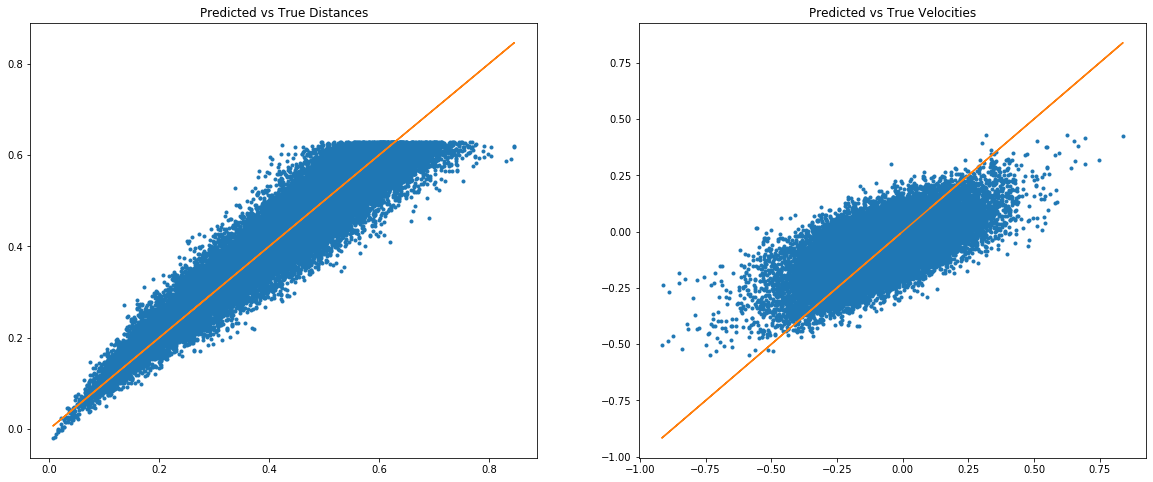

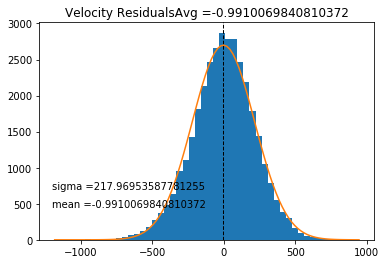

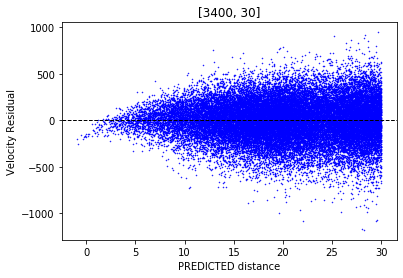

In [ ]:
#No automated LR, all tanh 
preds = model1.predict(X_test)
dist_vel(preds,y_test,rs,distance)
plt.show()
hist_resids(preds,y_test,rs,distance)

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


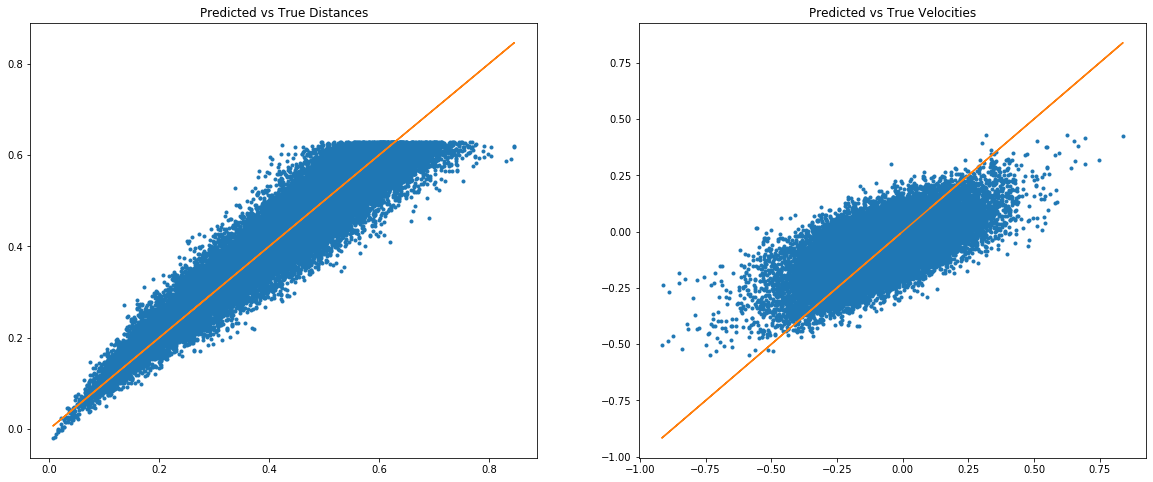

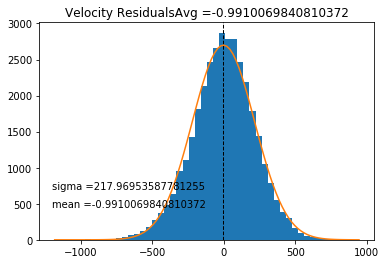

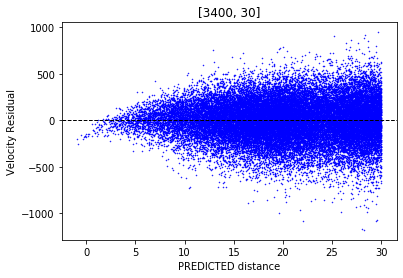

In [ ]:
#No automated LR, all selu 
preds = model2.predict(X_test)
dist_vel(preds,y_test,rs,distance)
plt.show()
hist_resids(preds,y_test,rs,distance)

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


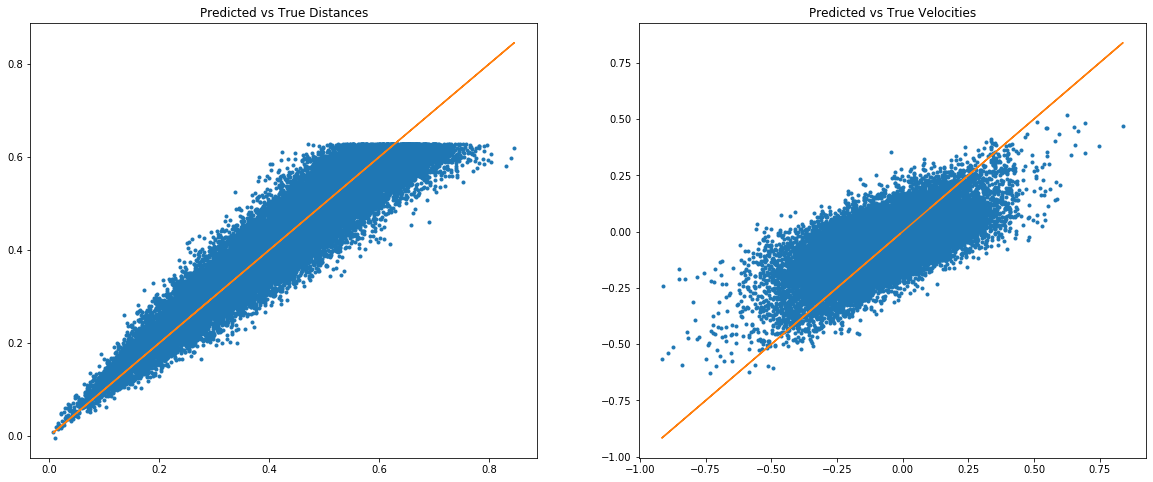

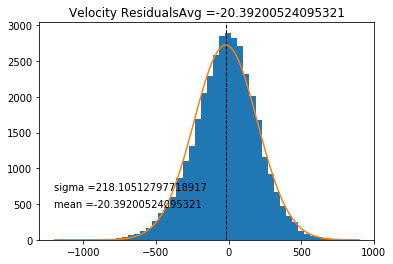

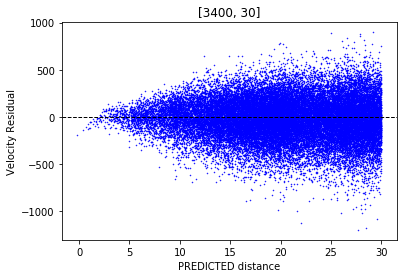

In [ ]:
#Automated LR, all selu 
preds = model9.predict(X_test)
dist_vel(preds,y_test,rs,distance)
plt.show()
hist_resids(preds,y_test,rs,distance)

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


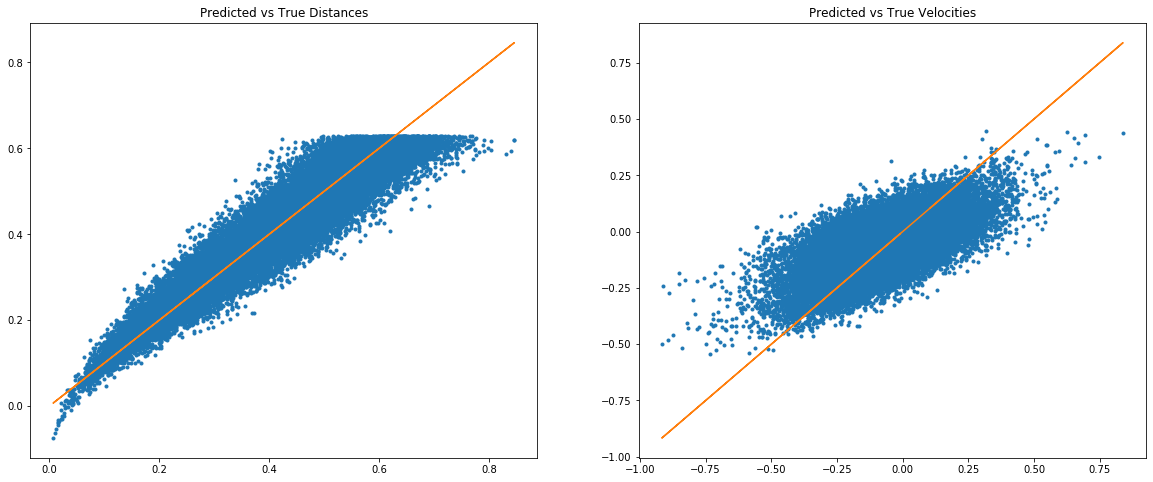

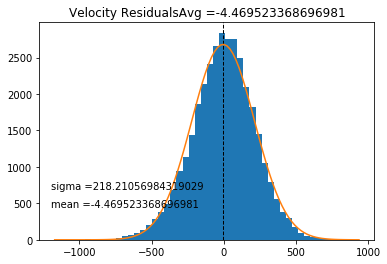

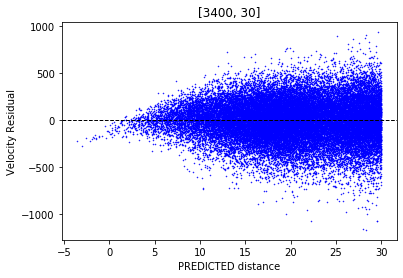

In [ ]:
#Automated LR, all tanh 
preds = model8.predict(X_test)
dist_vel(preds,y_test,rs,distance)
plt.show()
hist_resids(preds,y_test,rs,distance)

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


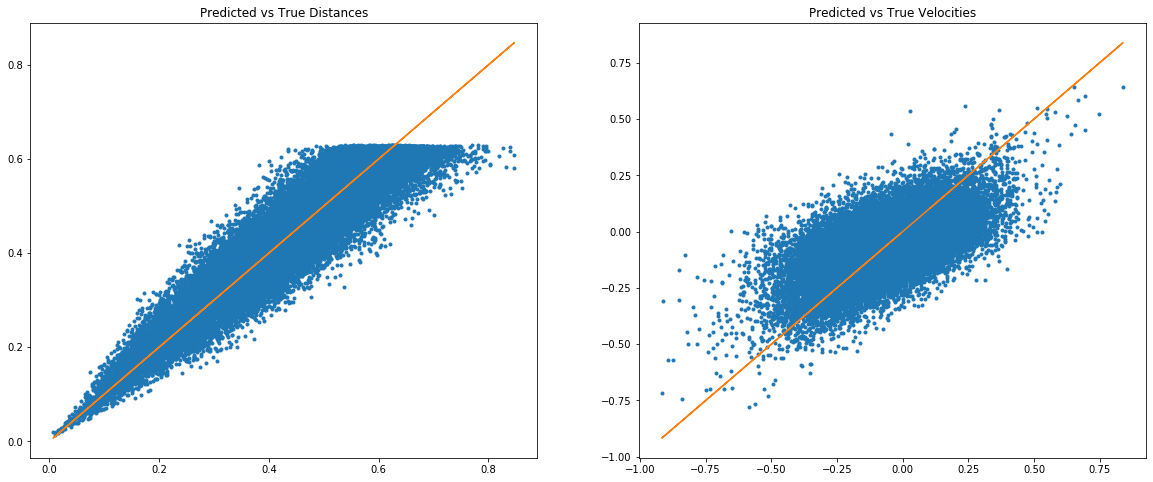

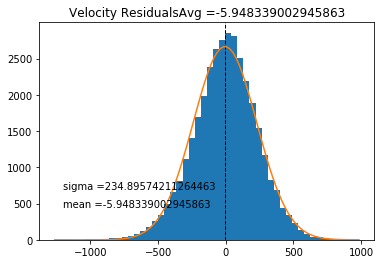

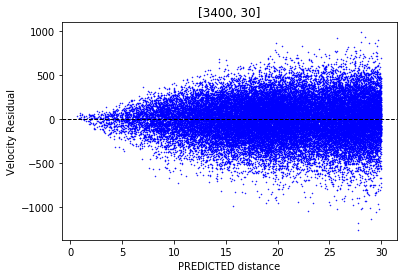

In [ ]:
regressor = RandomForestRegressor(n_estimators=500,max_depth=20000,random_state=0,n_jobs=10)
regressor.fit(X_train,y_train)
preds = regressor.predict(X_test)
dist_vel(preds,y_test,rs,distance)
plt.show()
hist_resids(preds,y_test,rs,distance)